<a href="https://colab.research.google.com/github/lala991204/DL-self-study/blob/master/tensorflow/4_2_mnist_functional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Functional API 사용하면, Sequential API로 구현할 수 없는 복잡한 구조의 모델 정의 가능. (Ex: 각 layer의 입력이 2개 이상, 출력이 2개 이상, 또는 중간에 있는 layer 건너뛰고 뒤쪽 layer로 출력 텐서 전달하는 방식)

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

0~9까지 숫자를 맞추는 정답(y) 외에 홀수인지 짝수인지를 판단하는 정답(y_odd)을 새로 만들어 추가하기로 한다.

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

# 새로운 출력 값 배열 생성(y_train값이 홀수:1, 짝수:0) => y_train와 같이 훈련 시 이용될 것.
y_train_odd = []
for y in y_train:
    if y % 2 == 0:
        y_train_odd.append(0)
    else:
        y_train_odd.append(1)
y_train_odd = np.array(y_train_odd)
print(y_train_odd.shape)
print('\n')

print(y_train[:10])
print(y_train_odd[:10])

# validation 데이터셋 처리
y_valid_odd = []
for y in y_valid:
    if y % 2 == 0:
        y_valid_odd.append(0)
    else:
        y_valid_odd.append(1)
y_valid_odd = np.array(y_valid_odd)
print(y_valid_odd.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
(60000,)


[5 0 4 1 9 2 1 3 1 4]
[1 0 0 1 1 0 1 1 1 0]


(10000,)

In [ ]:
# 정규화(Normalization)
x_train = x_train / 255.0
x_valid = x_valid / 255.0

# 채널 추가(색상이 하나인 모노 컬러 이미지이므로)
x_train_in = tf.expand_dims(x_train, -1) 
x_valid_in = tf.expand_dims(x_valid, -1)
print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


# (Functional API) 다중 입력, 다중 출력 레이어 생성

In [ ]:
# Functional API 사용하여 모델 생성
inputs = tf.keras.layers.Input(shape=(28,28,1))

conv = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(inputs)
pool = tf.keras.layers.MaxPooling2D((2,2))(conv)
flat = tf.keras.layers.Flatten()(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
outputs = tf.keras.layers.Dense(10, activation='softmax')(concat)

model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 26, 26, 32)   320         ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 13, 13, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 flatten (Flatten)              (None, 5408)         0           ['max_pooling2d[0][0]']          
                                                                                              

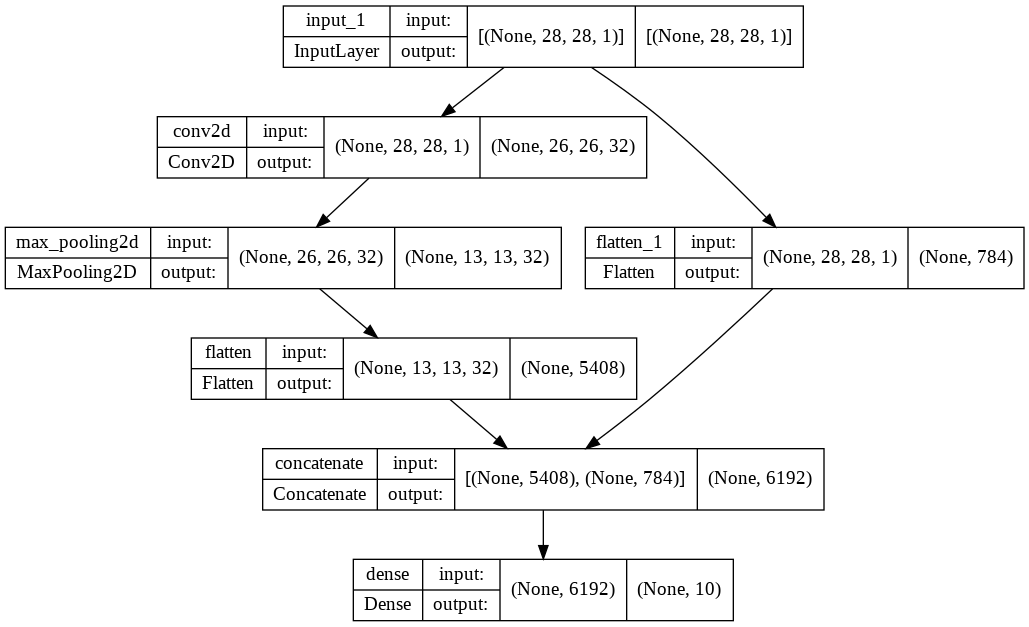

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True, to_file='functional_cnn.png')

위와 같이 input layer가 2개의 출력으로 나누어지고, 마지막 dense layer를 통과하기 전에 concatenate layer에서 하나로 합쳐지는 구조를 볼 수 있음.

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    validation_data = (x_valid_in, y_valid),
                    epochs=10)
val_loss, val_acc = model.evaluate(x_valid_in, y_valid)
print(val_loss, val_acc)

Epoch 1/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2303 - accuracy: 0.9342 - val_loss: 0.0996 - val_accuracy: 0.9708
Epoch 2/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0863 - accuracy: 0.9747 - val_loss: 0.0679 - val_accuracy: 0.9782
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0630 - accuracy: 0.9812 - val_loss: 0.0632 - val_accuracy: 0.9799
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0511 - accuracy: 0.9846 - val_loss: 0.0572 - val_accuracy: 0.9811
Epoch 5/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0425 - accuracy: 0.9869 - val_loss: 0.0622 - val_accuracy: 0.9803
Epoch 6/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0359 - accuracy: 0.9890 - val_loss: 0.0616 - val_accuracy: 0.9810
Epoch 7/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0308 - accuracy: 0.9902 - val_loss: 0.0647 -

앞서 학습했던 Sequential model과 정확도에서 큰 차이는 없음.
그러나, 이런 단순한 문제와 달리 복잡한 경우에는 모델의 구조를 다양하게 만들어 더 좋은 성능을 보여주는 모델을 찾는 과정이 필요하다.

# 다중 출력 분류 모델

0~9까지 숫자를 맞추는 분류 문제와 홀,짝수를 맞추는 분류 문제를 동시에 풀어내는 모델을 정의하는 코드이다. 각기 다른 문제에 맞도록 최종 분류기의 output layer를 2개 만드는 것이 핵심!!

In [ ]:
inputs = tf.keras.layers.Input(shape=(28,28,1), name='inputs')

conv = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', name='conv2d_layer')(inputs)
pool = tf.keras.layers.MaxPooling2D((2, 2), name='maxpool_layer')(conv)
flat = tf.keras.layers.Flatten(name='flatten_layer')(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
digit_outputs = tf.keras.layers.Dense(10, activation='softmax', name='digit_dense')(concat)       # muti-classification

odd_outputs = tf.keras.layers.Dense(1, activation='sigmoid', name='odd_dense')(flat_inputs)       # binary classification

model = tf.keras.models.Model(inputs=inputs, outputs=[digit_outputs, odd_outputs])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputs (InputLayer)            [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_layer (Conv2D)          (None, 26, 26, 32)   320         ['inputs[0][0]']                 
                                                                                                  
 maxpool_layer (MaxPooling2D)   (None, 13, 13, 32)   0           ['conv2d_layer[0][0]']           
                                                                                                  
 flatten_layer (Flatten)        (None, 5408)         0           ['maxpool_layer[0][0]']          
                                                                                            

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='inputs'), name='inputs', description="created by layer 'inputs'")
[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'digit_dense')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'odd_dense')>]


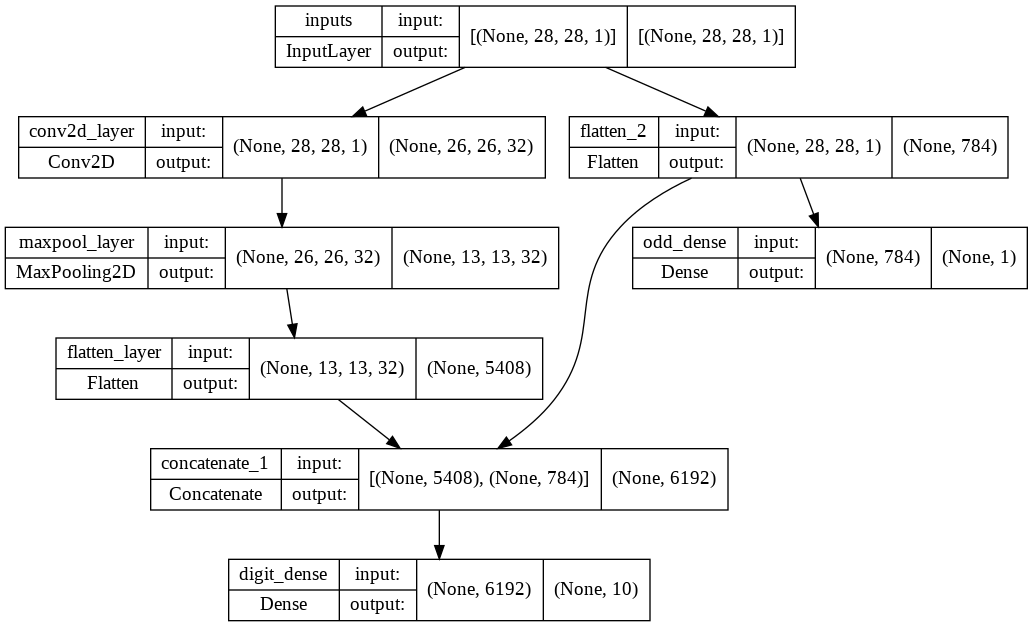

In [ ]:
# 모델의 입,출력을 나타내는 텐서
print(model.input)
print(model.output)    # 10개인 텐서와 1개인 텐서 총 두 개
plot_model(model, show_shapes=True, show_layer_names=True, to_file='multi_output_cnn.png')

In [ ]:
model.compile(optimizer='adam', loss={'digit_dense':'sparse_categorical_crossentropy',      # 딕셔너리 형태로 각 출력 Dense layer에 해당하는 loss,weight 지정
                                      'odd_dense':'binary_crossentropy'},
              loss_weights={'digit_dense':1, 'odd_dense':0.5},
              # loss = 1.0 * sparse_categorical_crossentropy + 0.5 * binary_crossentropy
              metrics=['accuracy'])

history = model.fit({'inputs':x_train_in}, {'digit_dense':y_train, 'odd_dense':y_train_odd},
                    validation_data=({'inputs':x_valid_in}, {'digit_dense':y_valid, 'odd_dense':y_valid_odd}),
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.3721 - digit_dense_loss: 0.2077 - odd_dense_loss: 0.3287 - digit_dense_accuracy: 0.9410 - odd_dense_accuracy: 0.8615 - val_loss: 0.2177 - val_digit_dense_loss: 0.0781 - val_odd_dense_loss: 0.2792 - val_digit_dense_accuracy: 0.9767 - val_odd_dense_accuracy: 0.8897
Epoch 2/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2131 - digit_dense_loss: 0.0772 - odd_dense_loss: 0.2720 - digit_dense_accuracy: 0.9769 - odd_dense_accuracy: 0.8912 - val_loss: 0.1949 - val_digit_dense_loss: 0.0621 - val_odd_dense_loss: 0.2655 - val_digit_dense_accuracy: 0.9798 - val_odd_dense_accuracy: 0.8967
Epoch 3/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.1896 - digit_dense_loss: 0.0583 - odd_dense_loss: 0.2628 - digit_dense_accuracy: 0.9823 - odd_dense_accuracy: 0.8946 - val_loss: 0.1883 - val_digit_dense_loss: 0.0582 - val_odd_dense_loss: 0.2602 - val_digit_dense_accuracy: 0.9799 -

In [ ]:
# 모델 성능
model.evaluate({'inputs':x_valid_in}, {'digit_dense':y_valid, 'odd_dense':y_valid_odd})

313/313 [==============================] - 2s 6ms/step - loss: 0.1882 - digit_dense_loss: 0.0597 - odd_dense_loss: 0.2569 - digit_dense_accuracy: 0.9835 - odd_dense_accuracy: 0.9004


[0.18816399574279785,
 0.059733953326940536,
 0.2568601071834564,
 0.9835000038146973,
 0.9003999829292297]

숫자 맞추는 문제는 약 98% 정확도, 홀수 여부 판단 문제는 약 90% 정확도 보임.
이때, 홀수 여부 판단 분류기에 layer를 더 추가하여 예측 정확도를 높일 여지가 있음.

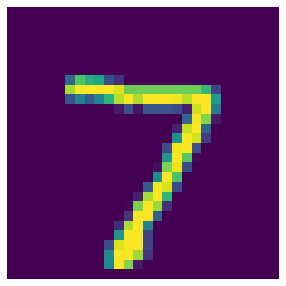

In [ ]:
def plot_image(data, idx):
    plt.figure(figsize=(5,5))
    plt.imshow(data[idx])
    plt.axis("off")
    plt.show()

plot_image(x_valid, 0)         # 검증 데이터셋의 인덱스 0에 해당하는 이미지

In [ ]:
digit_preds, odd_preds = model.predict(x_valid_in)
print(digit_preds[0])       # 10개 분류 레이블에 대한 확률 (숫자 7에 대한)
print(odd_preds[0])         # 홀수일 확률 (숫자 7에 대한)

digit_labels = np.argmax(digit_preds, axis=-1)
print(digit_labels[0:10])     # 10개 이미지에 대한

odd_labels = (odd_preds > 0.5).astype(np.int).reshape(1,-1)[0]
print(odd_labels[0:10])

[2.7911282e-12 2.8022584e-10 4.2191934e-09 2.9677144e-06 9.7354564e-12
 5.1014301e-12 4.2475272e-20 9.9999702e-01 4.9219100e-09 2.5183000e-09]
[0.99959147]
[7 2 1 0 4 1 4 9 5 9]
[1 0 1 0 0 1 0 1 1 1]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


# 전이 학습(Transfer Learning)

앞서 훈련한 모델의 일부를 가져와 그대로 사용하고, 최종 출력층만 새롭게 추가하여 모델을 재구성 가능하다. 기존에 학습된 모델을 활용해 새로운 모델을 만들어내는 개념을 Transfer Learning이라 부른다.

In [ ]:
# 앞의 모델에서 flatten_layer 출력을 추출
base_model_output = model.get_layer('flatten_layer').output

# 앞의 출력을 output으로 하는 모델 'base_model'정의
base_model = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base')
base_model.summary()

Model: "base"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


(28,28,1) 이미지를 받아 5,408개의 피처로 특징을 추출해 출력하는 모델이다.

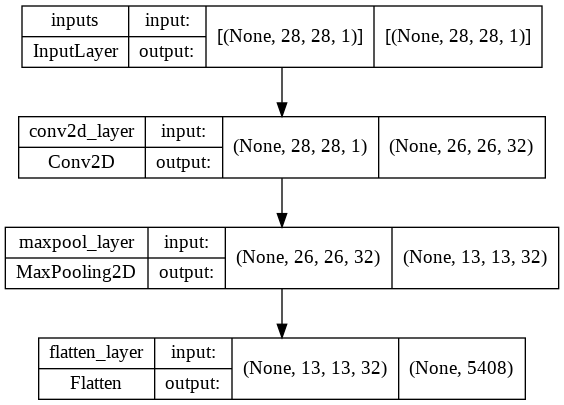

In [ ]:
plot_model(base_model, show_shapes=True, show_layer_names=True, to_file='base_model.png')

In [ ]:
# Sequential API 적용(앞서 정의한 base_model을 레이어로 추가, 최종 분류기 역할을 하는 Dense layer를 새롭게 추가)
digit_model = tf.keras.Sequential([
                                   base_model,
                                   tf.keras.layers.Dense(10, activation='softmax'),
                                   ])
digit_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base (Functional)           (None, 5408)              320       
                                                                 
 dense_1 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


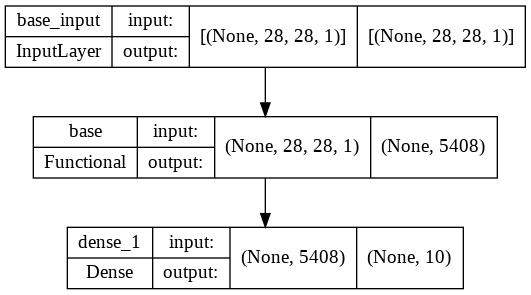

In [ ]:
plot_model(digit_model, show_shapes=True, show_layer_names=True, to_file='digit_model.png')

In [ ]:
digit_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])
history = digit_model.fit(x_train_in, y_train,
                          validation_data = (x_valid_in, y_valid),
                          epochs=10)

Epoch 1/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1294 - accuracy: 0.9635 - val_loss: 0.0654 - val_accuracy: 0.9798
Epoch 2/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0567 - accuracy: 0.9831 - val_loss: 0.0545 - val_accuracy: 0.9824
Epoch 3/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0433 - accuracy: 0.9869 - val_loss: 0.0518 - val_accuracy: 0.9827
Epoch 4/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0342 - accuracy: 0.9893 - val_loss: 0.0485 - val_accuracy: 0.9843
Epoch 5/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0273 - accuracy: 0.9915 - val_loss: 0.0552 - val_accuracy: 0.9844
Epoch 6/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0222 - accuracy: 0.9934 - val_loss: 0.0493 - val_accuracy: 0.9838
Epoch 7/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0182 - accuracy: 0.9945 - val_loss: 0.0545 -

약 98.5%의 정확도를 보인다.

In [ ]:
# base model의 가중치 고정(Freeze model)
base_model_frozen = tf.keras.models.Model(inputs=model.input,
                                          outputs=base_model_output,
                                          name='base_frozen')
base_model_frozen.trainable = False            # 모델의 파라미터 값이 고정되어 훈련 통해 업데이트 되지 않음! => Trainable params: 0
base_model_frozen.summary()

Model: "base_frozen"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


다음은 파라미터를 고정한 base_model_input 모델과 새로운 분류기 역할을 하는 Dense layer를 Functional API를 적용하여 구성해보자.

In [ ]:
# Functional API 적용
dense_output = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen.output)
digit_model_frozen = tf.keras.models.Model(inputs=base_model_frozen.input,
                                           outputs=dense_output)
digit_model_frozen.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_____________________________________________________

앞서 고정한 320개의 파라미터는 훈련이 불가능하다는 것이 표시되어 있음. 훈련 가능한 파라미터는 Flatten layer의 output 5,408개와 Dense layer의 10개 노드 사이의 가중치만 해당됨.=> 5,408*10+10

In [ ]:
digit_model_frozen.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                           metrics=['accuracy'])
history = digit_model_frozen.fit(x_train_in, y_train,
                                 validation_data=(x_valid_in, y_valid),
                                 epochs=10)

Epoch 1/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1157 - accuracy: 0.9683 - val_loss: 0.0578 - val_accuracy: 0.9820
Epoch 2/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0470 - accuracy: 0.9863 - val_loss: 0.0501 - val_accuracy: 0.9834
Epoch 3/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0341 - accuracy: 0.9898 - val_loss: 0.0574 - val_accuracy: 0.9820
Epoch 4/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0269 - accuracy: 0.9919 - val_loss: 0.0497 - val_accuracy: 0.9840
Epoch 5/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0209 - accuracy: 0.9938 - val_loss: 0.0502 - val_accuracy: 0.9843
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0172 - accuracy: 0.9951 - val_loss: 0.0563 - val_accuracy: 0.9852
Epoch 7/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0130 - accuracy: 0.9965 - val_loss: 0.0547 - val

이번에는 모델 전체가 아닌 특정 layer를 지정하여 파라미터가 업데이트되지 않도록 고정하는 방법도 가능.

In [ ]:
# base model의 Conv2D 레이어의 가중치만 고정(Freeze Layer)
base_model_frozen2 = tf.keras.models.Model(inputs=model.input,
                                           outputs=base_model_output,
                                           name='base_frozen2')
base_model_frozen2.get_layer('conv2d_layer').trainable = False
base_model_frozen2.summary()

Model: "base_frozen2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


위의 모델에 새로운 분류기 역할을 하는 Dense layer를 연결하여 모델 구성.

In [ ]:
# Functional API 적용
dense_output2 = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen2.output)
digit_model_frozen2 = tf.keras.models.Model(inputs=base_model_frozen2.input,
                                            outputs=dense_output2)
digit_model_frozen2.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_____________________________________________________

In [ ]:
digit_model_frozen2.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                            metrics=['accuracy'])

history = digit_model_frozen2.fit(x_train, y_train,
                                  validation_data=(x_valid_in, y_valid),
                                  epochs=10)

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1150 - accuracy: 0.9692 - val_loss: 0.0617 - val_accuracy: 0.9807
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0470 - accuracy: 0.9858 - val_loss: 0.0502 - val_accuracy: 0.9855
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0345 - accuracy: 0.9895 - val_loss: 0.0514 - val_accuracy: 0.9838
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0269 - accuracy: 0.9918 - val_loss: 0.0579 - val_accuracy: 0.9819
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0207 - accuracy: 0.9936 - val_loss: 0.0508 - val_accuracy: 0.9852
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0168 - accuracy: 0.9950 - val_loss: 0.0570 - val_accuracy: 0.9829
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0136 - accuracy: 0.9961 - val_loss: 0.0561 - val_ac